In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd

data_train = pd.read_csv('Data_Train.csv')
data_test = pd.read_csv('Data_Test.csv')

In [ ]:
data_train.head(10)

,Unnamed: 0,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,0,5274,08/07/2018,2266,17,27.4,44,1.7,2000,14.0,1.17,0.0,0.0,Yes
1,1,1185,19/01/2018,648,8,-2.5,50,1.0,1281,-11.5,0.00,0.0,0.0,Yes
2,2,6473,27/08/2018,886,16,24.7,85,1.2,1143,22.0,0.99,0.0,0.0,Yes
3,3,602,26/12/2017,127,1,-1.5,62,1.3,2000,-7.8,0.00,0.0,0.0,Yes
4,4,5656,24/07/2018,735,15,35.8,47,2.2,1029,22.7,1.51,0.0,0.0,Yes
5,5,3516,26/04/2018,930,11,18.1,42,2.7,1112,4.9,2.17,0.0,0.0,Yes
6,6,5240,07/07/2018,567,7,19.6,57,1.6,2000,10.8,0.42,0.0,0.0,Yes
7,7,2413,11/03/2018,666,12,9.2,40,2.6,592,-3.7,2.47,0.0,0.0,Yes
8,8,2463,13/03/2018,705,14,18.3,43,2.2,1509,5.4,2.43,0.0,0.0,Yes
9,9,3398,21/04/2018,1315,13,24.6,10,2.7,2000,-9.0,3.31,0.0,0.0,Yes


In [ ]:
data_train.drop('Unnamed: 0', axis=1, inplace=True)
data_test.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
import datetime

def get_season(string_date):
  date = datetime.datetime.strptime(string_date, "%d/%m/%Y").date()

  if (date.month == 3 and date.day >= 20) or (date.month == 4) or (date.month == 5) or (date.month == 6 and date.day < 21):
    # Spring: 20 Maret - 20 Juni
    return 'Spring'
  elif (date.month == 6 and date.day >= 21) or (date.month == 7) or (date.month == 8) or (date.month == 9 and date.day < 23):
    # Summer: 21 Juni - 22 September
    return 'Summer'
  elif (date.month == 9 and date.day >= 23) or (date.month == 10) or (date.month == 11) or (date.month == 12 and date.day < 22):
    # Autumn/Fall: 23 September - 21 Desember
    return 'Autumn'
  else:
    # Winter: 22 Desember - 19 Maret
    return 'Winter'

In [ ]:
data_train['Season'] = data_train['Date'].apply(get_season)
data_test['Season'] = data_test['Date'].apply(get_season)

In [ ]:
import requests
from bs4 import BeautifulSoup

# web scrapping
url = 'https://www.timeanddate.com/holidays/uk/2018'

page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

holiday = soup.find('table', {'id':'holidays-table'})
holiday_date = holiday.find_all('th', class_='nw')

holiday_date = [date.text.split(' ') for date in holiday_date]
holiday_date[:5]

[['Jan', '1'], ['Jan', '2'], ['Jan', '5'], ['Jan', '6'], ['Jan', '7']]

In [ ]:
def formatting_date(date):
  switcher = {
      'Jan': 1,
      'Feb': 2,
      'Mar': 3,
      'Apr': 4,
      'May': 5,
      'Jun': 6,
      'Jul': 7,
      'Aug': 8,
      'Sep': 9,
      'Oct': 10,
      'Nov': 11,
      'Dec': 12
  }
  return [switcher[date[0]],int(date[1])]

In [ ]:
formatted_date = [formatting_date(i) for i in holiday_date]
formatted_date[:5]

[[1, 1], [1, 2], [1, 5], [1, 6], [1, 7]]

In [ ]:
def get_holiday(string_date):
  date = datetime.datetime.strptime(string_date, "%d/%m/%Y").date()
  return ('Yes' if [date.month, date.day] in formatted_date else 'No')

In [ ]:
data_train['Holiday'] = data_train['Date'].apply(get_holiday)
data_test['Holiday'] = data_test['Date'].apply(get_holiday)

In [ ]:
data_train.isna().sum(), data_test.isna().sum()

(ID                             0
 Date                           0
 Rented Bike Count              0
 Hour                           0
 Temperature(°C)                0
 Humidity(%)                    0
 Wind speed (m/s)             175
 Visibility (10m)               0
 Dew point temperature(°C)      0
 Solar Radiation (MJ/m2)        0
 Rainfall(mm)                 175
 Snowfall (cm)                175
 Functioning Day                0
 Season                         0
 Holiday                        0
 dtype: int64,
 ID                            0
 Date                          0
 Hour                          0
 Temperature(°C)               0
 Humidity(%)                   0
 Wind speed (m/s)             43
 Visibility (10m)              0
 Dew point temperature(°C)     0
 Solar Radiation (MJ/m2)       0
 Rainfall(mm)                 43
 Snowfall (cm)                43
 Functioning Day               0
 Season                        0
 Holiday                       0
 dtype: int64

In [ ]:
import numpy as np

# filling missing value
for data in [data_train, data_test]:
  for column in ['Wind speed (m/s)', 'Rainfall(mm)', 'Snowfall (cm)']:
    for i in range(len(data)):
      if np.isnan(data[column].iloc[i]):
        start = max(i-5, 0)
        end = min(i+5, len(data))
        mean = data[column][start:end].mean()
        data[column].iloc[i] = mean

<ipython-input-13-92dec757610b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].iloc[i] = mean


In [ ]:
type(data_train['Wind speed (m/s)'])

pandas.core.series.Series

In [ ]:
y = data_train['Rented Bike Count']

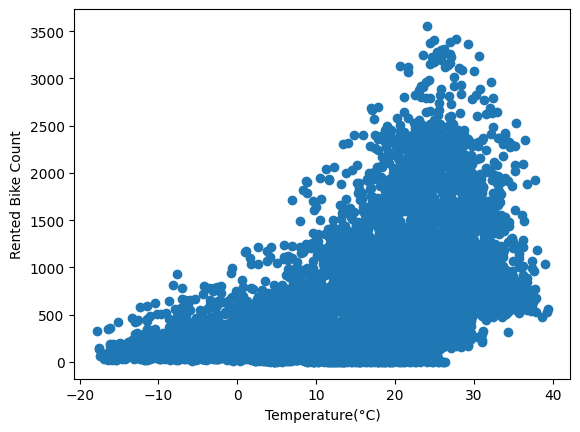

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data_train['Temperature(°C)'], y)
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

<ipython-input-17-1e98ec4ce89f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_hour = data_train.groupby('Hour').mean()


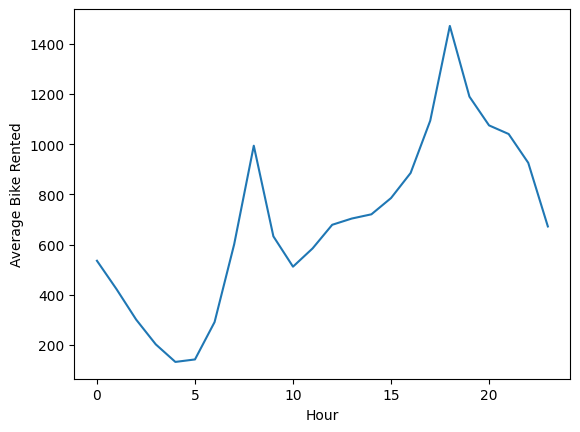

In [ ]:
groups_hour = data_train.groupby('Hour').mean()

groups_hour['Rented Bike Count'].plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('Average Bike Rented')
plt.show()

<ipython-input-18-b6f8631dcbe1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_season = data_train.groupby('Season').mean()


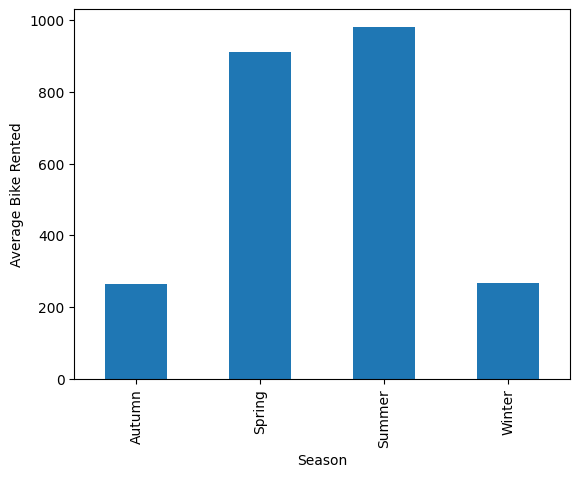

In [ ]:
groups_season = data_train.groupby('Season').mean()

groups_season['Rented Bike Count'].plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Bike Rented')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# encoding
le = LabelEncoder()

# data train
data_train = pd.get_dummies(data_train, columns=['Functioning Day'], prefix='FunctioningDay')
data_train = pd.get_dummies(data_train, columns=['Holiday'], prefix='Holiday')
data_train['Season'] = le.fit_transform(data_train['Season'])

# data test
data_test = pd.get_dummies(data_test, columns=['Functioning Day'], prefix='FunctioningDay')
data_test = pd.get_dummies(data_test, columns=['Holiday'], prefix='Holiday')
data_test['Season'] = le.transform(data_test['Season'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Feature scaling with normalization

# data train
scaler = MinMaxScaler()
data_train[data_train.columns[3:12]] = pd.DataFrame(scaler.fit_transform(data_train[data_train.columns[3:12]]),
                                                                         columns = data_train.columns[3:12])

# data test
scaler = MinMaxScaler()
data_test[data_test.columns[2:11]] = pd.DataFrame(scaler.fit_transform(data_test[data_test.columns[2:11]]),
                                                                         columns = data_test.columns[2:11])

In [ ]:
import joblib

scaler = MinMaxScaler()
scaler.fit(data_train[data_train.columns[3:12]])
joblib.dump(scaler, 'scaler_model.joblib')

['scaler_model.joblib']

In [ ]:
data_train = data_train.sort_values(by='ID')
data_test = data_test.sort_values(by='ID')

In [ ]:
from sklearn.model_selection import train_test_split

X = data_train[data_train.columns[3:20]]
y = data_train[data_train.columns[2]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVR

model_1 = SVR(kernel = 'rbf')
model_1.fit(X_train, y_train)

SVR()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor()
model_3.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_4 = GradientBoostingRegressor()
model_4.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
class MyModel(RandomForestRegressor):
  def predict(self, X):
    y = super().predict(X)
    for i in range(len(X['FunctioningDay_No'])):
      if X['FunctioningDay_No'].iloc[i] == 1:
        y[i] = 0
    return y

model_x = MyModel()
model_x.fit(X_train, y_train)

MyModel()

In [ ]:
def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(actual - forecast) / (np.abs(actual) + np.abs(forecast)))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("Model 1: Support Vector Regressor (RBF)")
print("SMAPE: ", smape(y_test, model_1.predict(X_test)))
print("MSE: ", mean_squared_error(y_test, model_1.predict(X_test)))
print("R2: ", r2_score(y_test, model_1.predict(X_test)))

Model 1: Support Vector Regressor (RBF)
SMAPE:  65.69105920359416
MSE:  369295.3440083637
R2:  0.18020200936680397


In [ ]:
print("Model 2: Decision Tree Regressor")
print("SMAPE: ", smape(y_test, model_2.predict(X_test)))
print("MSE: ", mean_squared_error(y_test, model_2.predict(X_test)))
print("R2: ", r2_score(y_test, model_2.predict(X_test)))

Model 2: Decision Tree Regressor
SMAPE:  35.153824077732786
MSE:  93979.53281027105
R2:  0.7913750243307648


In [ ]:
print("Model 3: Random Forest Regressor")
print("SMAPE: ", smape(y_test, model_3.predict(X_test)))
print("MSE: ", mean_squared_error(y_test, model_3.predict(X_test)))
print("R2: ", r2_score(y_test, model_3.predict(X_test)))

Model 3: Random Forest Regressor
SMAPE:  29.58669937602752
MSE:  50133.91468594864
R2:  0.8887078237271631


In [ ]:
print("Model 4: Gradient Boosting Regressor")
print("SMAPE: ", smape(y_test, model_4.predict(X_test)))
print("MSE: ", mean_squared_error(y_test, model_4.predict(X_test)))
print("R2: ", r2_score(y_test, model_4.predict(X_test)))

Model 4: Gradient Boosting Regressor
SMAPE:  37.53804899944215
MSE:  55539.25901207106
R2:  0.8767085107406031


In [ ]:
print("Model X: Modified RF")
print("SMAPE: ", smape(y_test, model_x.predict(X_test)))
print("MSE: ", mean_squared_error(y_test, model_x.predict(X_test)))
print("R2: ", r2_score(y_test, model_x.predict(X_test)))

Model X: Modified RF
SMAPE:  27.196447623605852
MSE:  48588.11982089872
R2:  0.8921393306358186


In [ ]:
final_model = MyModel()
final_model.fit(X, y)

MyModel()

In [ ]:
submission = pd.DataFrame({'ID':data_test['ID'],
              'Rented Bike Count':final_model.predict(data_test[data_test.columns[2:16]])})

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
import joblib

# deploy model
joblib.dump(final_model, 'modelX.joblib')

['modelX.joblib']

In [ ]:
import os

model_size = os.path.getsize('modelX.joblib') / (1024 * 1024)  # Mengonversi ke MB
print(f"Ukuran Model: {model_size:.2f} MB")

Ukuran Model: 59.74 MB
